In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn import model_selection  #(ранее - cross_validation)
from sklearn import metrics
from pandas import DataFrame

import seaborn as sns
sns.set()

%pylab inline
#запускает импорт различных модулей в Matplotlib (импорт Matplotlib и NumPy)

from scipy import polyval, stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
iris = datasets.load_iris()

In [3]:
iris.feature_names
# названия переменных

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names
# целевая переменная - сорт Ириса

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.target
# целевая переменная - 0 — Setosa, 1 — Versicolor, 2 — Virginica

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris.data[:10]
#  10 первых строк

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

### Задача — по имеющимся данным попробовать найти зависимости между размерами лепестков и сортами Ирисов.

#### Преобразование данных

In [7]:
# преобразование списка в DF
iris_df = DataFrame(iris.data)

In [8]:
# назначение имен столбцам по именам переменных в списке
iris_df.columns = iris.feature_names

In [9]:
# добавление столбца с номинативными данными целевой переменной
iris_df["target"] = iris.target

In [10]:
# добавление столбца с названием целевой переменной - сорт Ириса
iris_df["name"] = iris_df.target.apply(lambda x: iris.target_names[x])

In [11]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


#### Описательные статистики

In [12]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


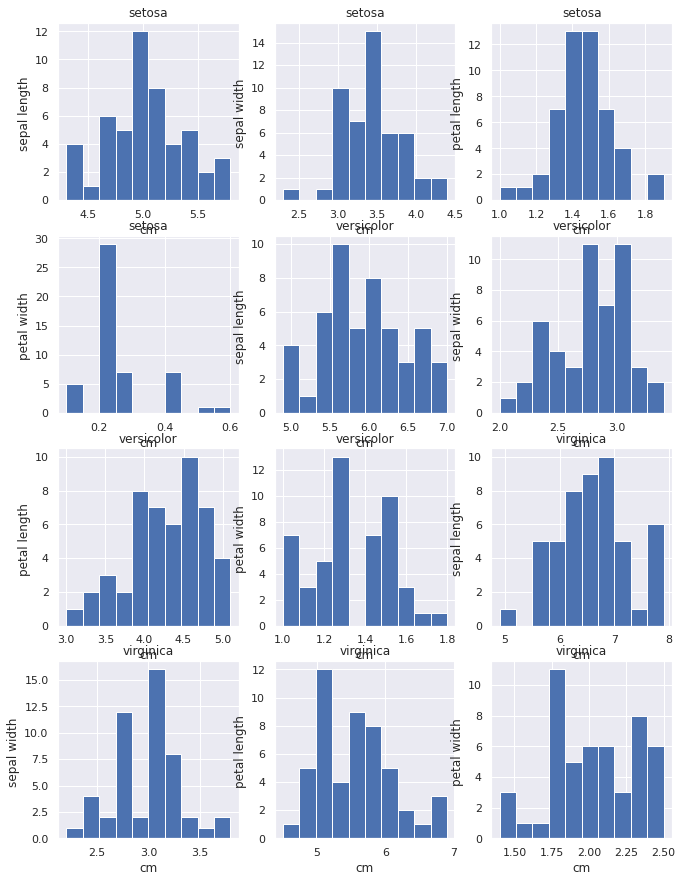

In [13]:
# Гистограммы по каждому признаку
pyplot.figure(figsize(11, 15))
plot_number = 0

for target_name in iris['target_names']:
    for feature_name in iris['feature_names']:
        plot_number += 1
        pyplot.subplot(4, 3, plot_number)
        pyplot.hist(iris_df[iris_df.name == target_name][feature_name])
        pyplot.title(target_name)
        pyplot.xlabel('cm')
        pyplot.ylabel(feature_name[:-4])

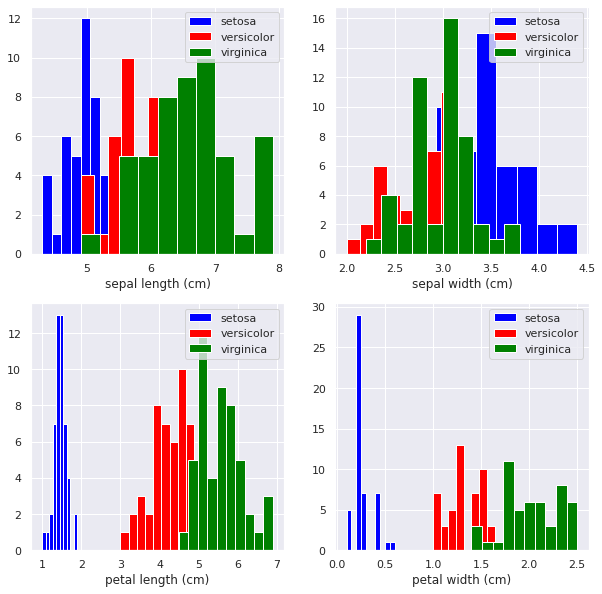

In [14]:
# Гистограммы по каждому признаку
fig, axes = subplots(nrows=2, ncols=2, figsize=(10, 10))
colors = ['blue', 'red', 'green']

for i, ax in enumerate(axes.flat):
    for label, color in zip(range(len(iris.target_names)), colors):
        ax.hist(iris.data[iris.target == label, i],
                label=iris.target_names[label],
                color=color)
        ax.set_xlabel(iris.feature_names[i])
        ax.legend(loc='upper right')

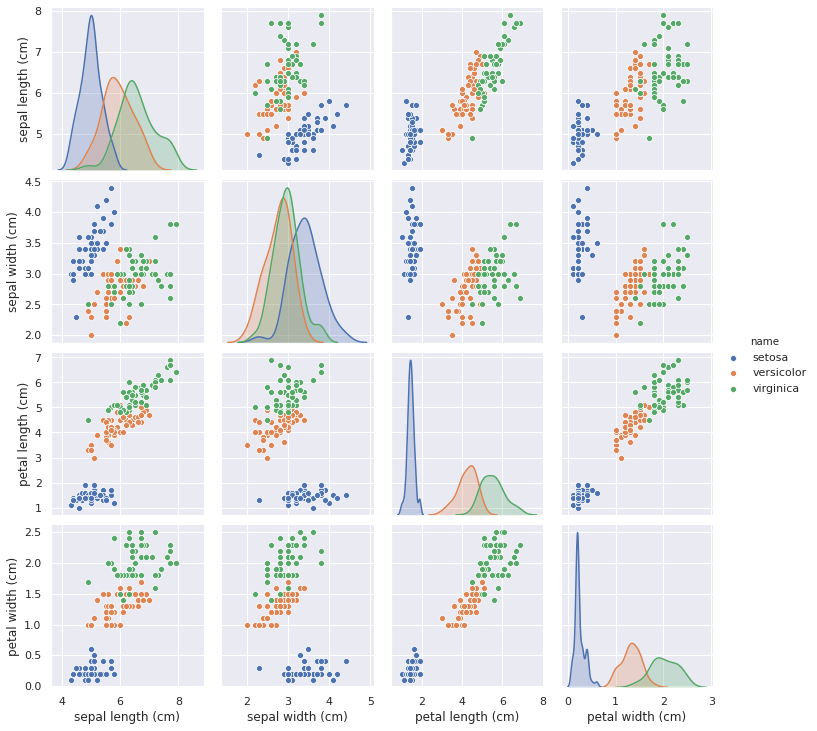

In [15]:
# таблица зависимостей между признаками
import seaborn as sns
sns.pairplot(iris_df[[
    'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
    'petal width (cm)', 'name'
]],
             hue='name')

Наблюдается зависимость между «petal width (cm)» и «petal length (cm)» — 

Характер взаимосвязи 2х переменных линейный с положительным значением 

Это позволяет применить регрессионный анализ для исследования взаимосвязи

#### Зависимость между переменными

In [16]:
iris_df[[
    'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
    'petal width (cm)'
]].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


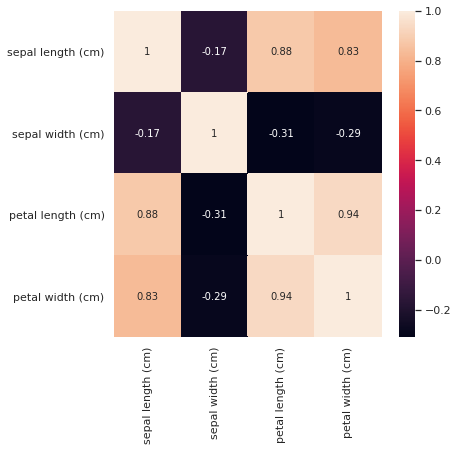

In [17]:
fig, ax = subplots(figsize=(6, 6))
sns.heatmap(iris_df[[
    'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
    'petal width (cm)'
]].corr(method="spearman"),
            annot=True)

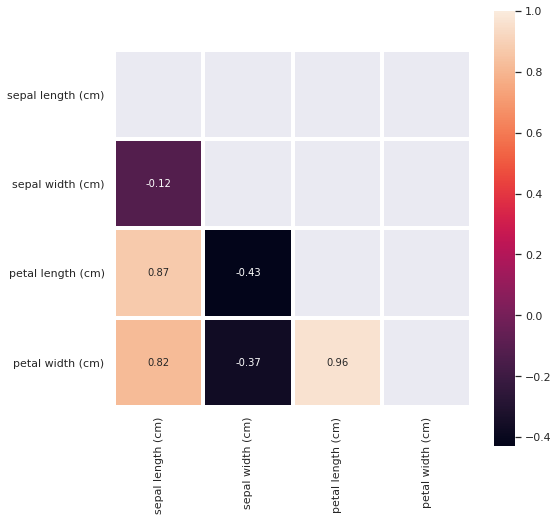

In [18]:
fig, ax = subplots(figsize=(8, 8))
corr = iris_df[[
    'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
    'petal width (cm)'
]].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("dark"):
    ax = sns.heatmap(corr,
                     mask=mask,
                     square=True,
                     cbar=True,
                     annot=True,
                     linewidths=3)

Между переменными «petal length (cm)» и «petal width (cm)» выявлена очень сильная зависимость 0.96.

#### Линейная регрессия для переменных с наибольшей зависимостью

   Регрессионный анализ позволит проверить гипотезу о взаимосвязи

In [19]:
x = iris_df['petal length (cm)']
y = iris_df['petal width (cm)']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
stats.linregress(x, y)

LinregressResult(slope=0.41575541635241114, intercept=-0.36307552131902776, rvalue=0.9628654314027963, pvalue=4.6750039073255014e-86, stderr=0.009582435790766206)

p-уровень значимости pvalue=4.6750039073255014e-86 - нет оснований отклонять нулевую гипотезу о взаимосвязи

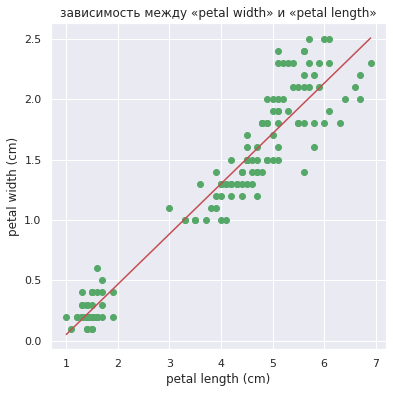

In [20]:
fig, ax = subplots(figsize=(6, 6))
mn = np.min(x)
mx = np.max(x)
x1 = np.linspace(mn, mx, 500)
y1 = slope * x1 + intercept
plot(x, y, 'go')  #диаграмма рассеивания
plot(x1, y1, '-r')  #регрессионная прямая
title("зависимость между «petal width» и «petal length»")
xlabel("petal length (cm)")
ylabel("petal width (cm)")

Наблюдается положительная взаимосвязь(уравнение регрессии y=-0.36307552131902776+0.41575541635241114*x)